In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
yelp = pd.read_csv('yelp_review.csv')

In [9]:
yelp = yelp.drop('Unnamed: 0', axis=1)
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641534 entries, 0 to 641533
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   business_id        641534 non-null  object
 1   categories         641534 non-null  object
 2   review_id          641534 non-null  object
 3   user_id            641534 non-null  object
 4   stars              641534 non-null  int64 
 5   useful             641534 non-null  int64 
 6   text               641534 non-null  object
 7   date               641534 non-null  object
 8   user_review_count  641534 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 44.1+ MB


In [10]:
yelp[:5]

,business_id,categories,review_id,user_id,stars,useful,text,date,user_review_count
0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,28
1,UQssxfQY7LcLEtagk9ecog,"Pakistani, Indian, Restaurants, Halal",0y3cVL5vdd9zpSDN-kaOIQ,3-1va0IQfK-9tUMzfHWfTA,5,1,I was pleasantly surprised when I dined here l...,2018-01-18 14:53:43,28
2,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",_hJu0u6nB-8LIeQJY4Vg4w,KQSRUu4Aapl0hG6eu2v8iw,4,1,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25,759
3,2rQFgavS-942RapZTBSBTw,"Italian, Pizza, Restaurants, American (Traditi...",pWJZOVlRYQoDth22olrjjg,KQSRUu4Aapl0hG6eu2v8iw,1,1,Edit: I don't know what happened. The service ...,2018-04-02 00:24:09,759
4,UNWb37aMC3nuWdszceGMxg,"Restaurants, Pakistani, Indian",bTQSVdKqplptyJaynbBWJA,KQSRUu4Aapl0hG6eu2v8iw,3,2,I've ordered delivery and also ate in the rest...,2018-05-12 02:52:28,759


In [14]:
stars = yelp["stars"]

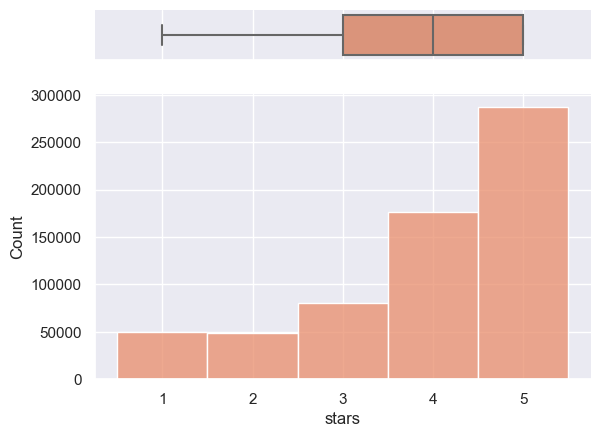

In [39]:
sns.set(style="darkgrid")
sns.set_palette("flare")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data=yelp, x="stars", ax=ax_box)
sns.histplot(data=yelp, bins=np.arange(1, 7) - 0.5, x="stars", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='', yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [41]:
text = " ".join(review for review in yelp.text)
print ("There are {} words in the combination of all review.".format(len(text)))


There are 462966372 words in the combination of all review.


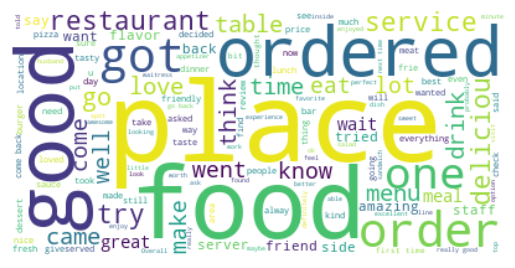

In [43]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()